In [371]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [191]:
bank_marketing = pd.read_csv('bank-full.csv',delimiter=';') # as our data was saved with semicolon ';' we have used 'delimiter'

In [192]:
bank_marketing.shape

(45211, 17)

45211 rows and 17 columns/features in our dataset

In [193]:
bank_marketing.head(10)  # To display first 10 data rows from out dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [194]:
bank_marketing.tail(10)  # To display last 10 data rows from out dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [195]:
# To know about null values present in our data

bank_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


We can clearly observe that no null values are present in our data.

In [196]:
# To know all the statstical data

bank_marketing.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In our analysis, it's evident that each feature meets the required significance criteria, except for the 'pdays' column, where the presence of -1 values poses potential challenges for subsequent calculations.

In [63]:
bank_marketing.loc[bank_marketing['pdays']==-1,'pdays'] = 0   

To enhance precision in our calculations, we'll adjust the 'pdays' column by converting all occurrences of -1 to '0', effectively representing zero days.

In [64]:
bank_marketing.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,0,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,0,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,0,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,0,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,0,0,unknown,no


In [65]:
bank_marketing.tail(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45191,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183,1,failure,yes
45192,29,management,single,tertiary,no,765,no,no,cellular,16,nov,238,1,0,0,unknown,yes
45193,28,self-employed,single,tertiary,no,159,no,no,cellular,16,nov,449,2,33,4,success,yes
45194,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,no
45195,68,retired,married,secondary,no,1146,no,no,cellular,16,nov,212,1,187,6,success,yes
45196,25,student,single,secondary,no,358,no,no,cellular,16,nov,330,1,0,0,unknown,yes
45197,36,management,single,secondary,no,1511,yes,no,cellular,16,nov,270,1,0,0,unknown,yes
45198,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,0,0,unknown,no
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45200,38,technician,married,secondary,no,557,yes,no,cellular,16,nov,1556,4,0,0,unknown,yes


# 

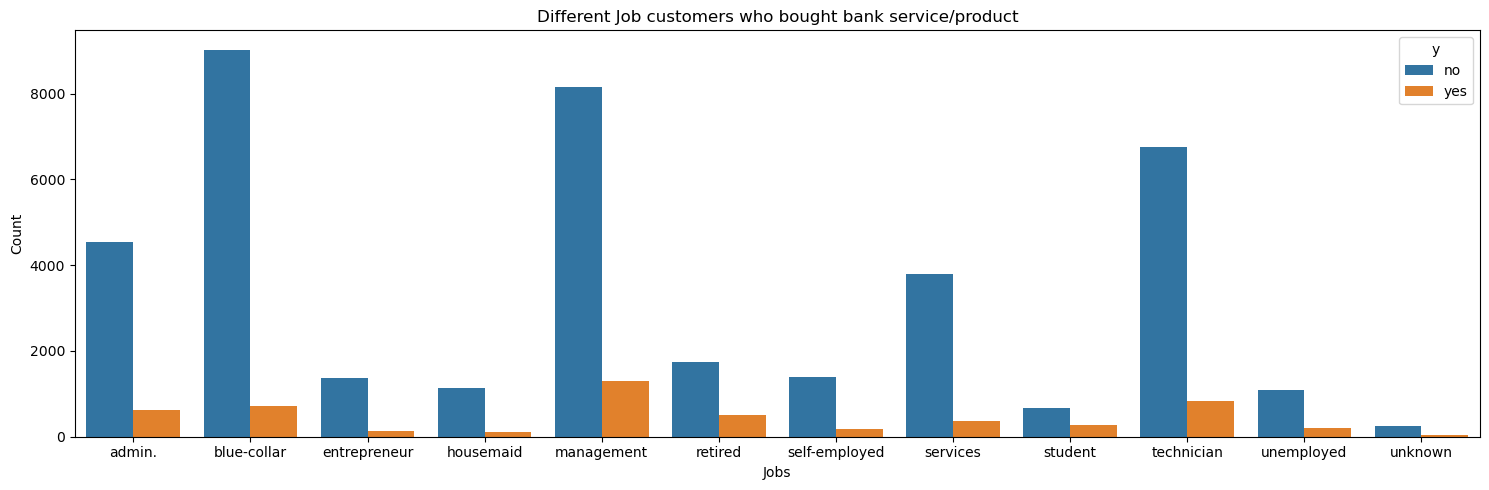

In [361]:
plt.figure(figsize=(15,5))

# Plot the bar graph for distribution of customers belonging to different jobs wrt to 'y'
sns.barplot(data=bank_marketing.groupby('job')['y'].value_counts().reset_index(), x='job',y='count',hue='y')

# Optionally, you can add labels and customize the plot further
plt.xlabel('Jobs')
plt.ylabel('Count')
plt.title('Different Job customers who bought bank service/product')
plt.tight_layout()
plt.show()


"We observe a notable trend regarding the purchase of the bank's product/service across different job categories. Specifically, individuals in management roles have demonstrated the highest propensity to make purchases, as evidenced by their predominant engagement with the bank's offerings."

# 

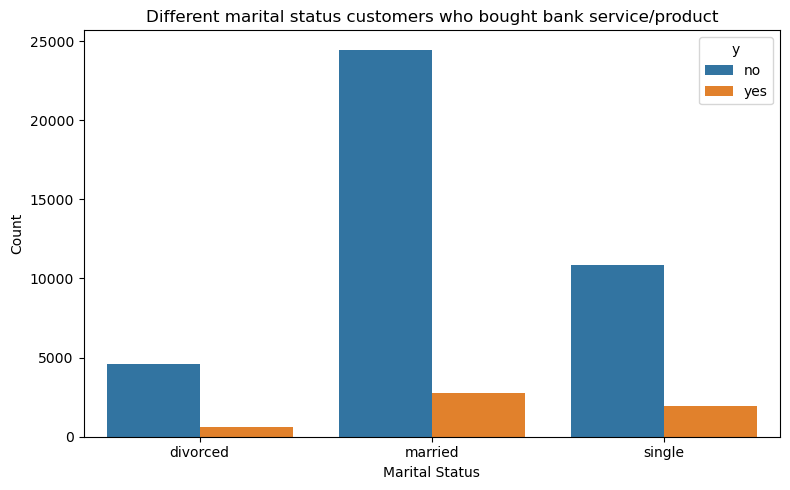

In [362]:
plt.figure(figsize=(8,5))

# Plot the bar graph for distribution of different marital customers wrt to 'y'
sns.barplot(data=bank_marketing.groupby('marital')['y'].value_counts().reset_index(), x='marital',y='count',hue='y')

# Optionally, you can add labels and customize the plot further
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Different marital status customers who bought bank service/product')
plt.tight_layout()
plt.show()


"We note a predominant trend indicating higher engagement with the bank's services/products among married customers. This suggests a notable preference for the bank's offerings within this demographic segment."

# 

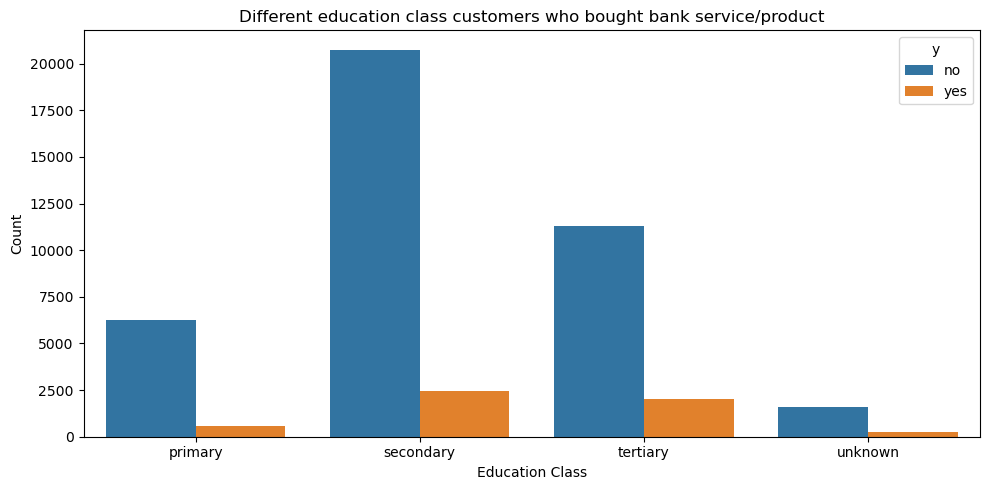

In [363]:
plt.figure(figsize=(10,5))

sns.barplot(data=bank_marketing.groupby('education')['y'].value_counts().reset_index(), x='education',y='count',hue='y')

# Optionally, you can add labels and customize the plot further
plt.xlabel('Education Class')
plt.ylabel('Count')
plt.title('Different education class customers who bought bank service/product')
plt.tight_layout()
plt.show()


We identify a substantial count of customers with secondary education level as the primary demographic engaging with the bank's services/products. This underscores the significant uptake of the bank's offerings within this educational category.

# 

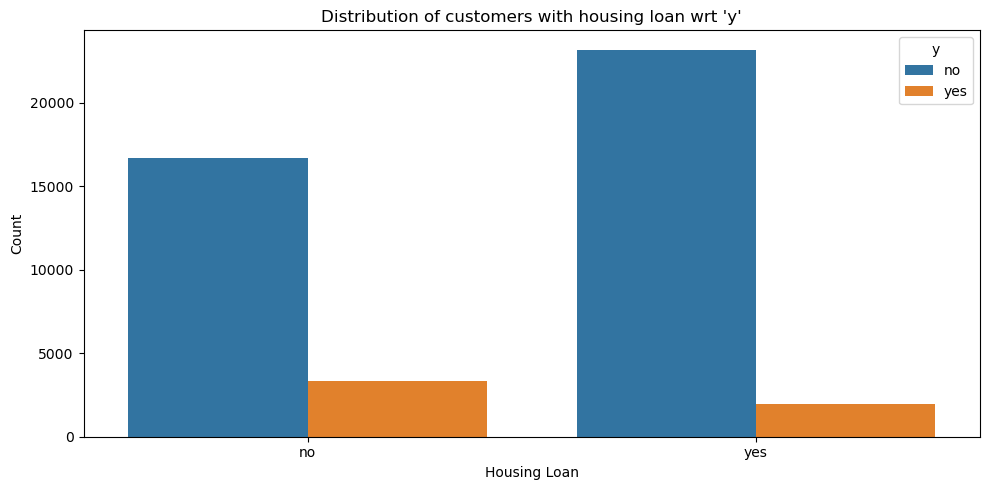

In [365]:
plt.figure(figsize=(10,5))


sns.barplot(data=bank_marketing.groupby('housing')['y'].value_counts().reset_index(), x='housing',y='count',hue='y')

# Optionally, you can add labels and customize the plot further
plt.xlabel('Housing Loan')
plt.ylabel('Count')
plt.title("Distribution of customers with housing loan wrt 'y'")
plt.tight_layout()
plt.show()


"Our analysis reveals a predominant preference for the bank's services/products among individuals without housing loans. This indicates a notable inclination towards engaging with the bank's offerings within this segment of the population."







# 

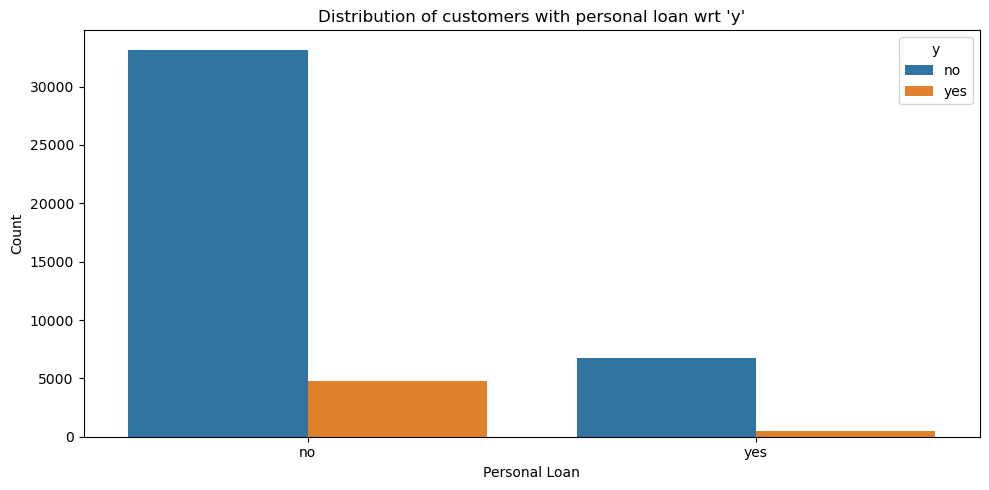

In [366]:
plt.figure(figsize=(10,5))

sns.barplot(data=bank_marketing.groupby('loan')['y'].value_counts().reset_index(), x='loan',y='count',hue='y')

# Optionally, you can add labels and customize the plot further
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.title("Distribution of customers with personal loan wrt 'y'")
plt.tight_layout()
plt.show()


"Here also, our analysis reveals a predominant preference for the bank's services/products among individuals without personal loans too. This indicates a notable inclination towards engaging with the bank's offerings within this segment of the population."







# 

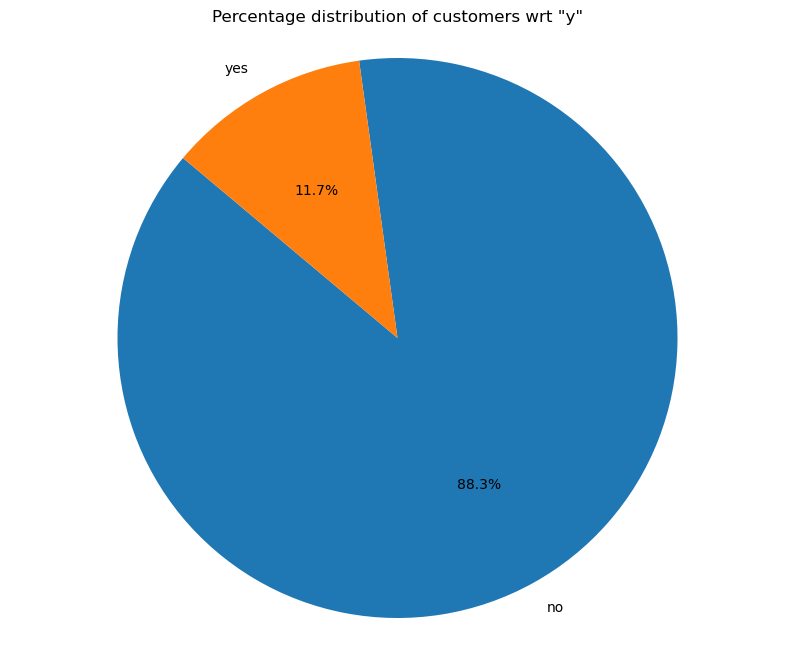

In [367]:
# Plot a pie chart for each job category
plt.figure(figsize=(10, 8))
plt.pie(bank_marketing['y'].value_counts(), labels=bank_marketing['y'].value_counts().keys(), autopct='%1.1f%%', startangle=140)
plt.title('Percentage distribution of customers wrt "y"')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()


"An overarching trend emerges from our analysis, indicating that a majority, or 88.3%, of customers have not engaged with the bank's services or products, while 11.7% have made purchases. This underscores the need for targeted strategies to effectively reach and engage with potential customers in order to enhance product adoption."

# 

Let's transform our categorical data into integer representations using Label Encoding.

In [67]:
lb = LabelEncoder()

In [68]:
obj_col = bank_marketing.select_dtypes(include=['object']).columns   # here we are only focusing on object/string type columns
obj_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [69]:
bank_marketing[obj_col] = bank_marketing[obj_col].apply(lb.fit_transform)

In [70]:
bank_marketing.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,0,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,0,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,0,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,0,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,0,0,3,0
5,35,4,1,2,0,231,1,0,2,5,8,139,1,0,0,3,0
6,28,4,2,2,0,447,1,1,2,5,8,217,1,0,0,3,0
7,42,2,0,2,1,2,1,0,2,5,8,380,1,0,0,3,0
8,58,5,1,0,0,121,1,0,2,5,8,50,1,0,0,3,0
9,43,9,2,1,0,593,1,0,2,5,8,55,1,0,0,3,0


In [71]:
bank_marketing.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211.0,4.339762,3.272657,0.0,1.0,4.0,7.0,11.0
marital,45211.0,1.167725,0.608230,0.0,1.0,1.0,2.0,2.0
education,45211.0,1.224813,0.747997,0.0,1.0,1.0,2.0,3.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
contact,45211.0,0.640242,0.897951,0.0,0.0,0.0,2.0,2.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


Now, with the data transformed using Label Encoding, we can observe an expanded set of statistical insights across multiple columns.

# 

We'll now define the "X" and "Y" parameters to facilitate the training of our decision tree model.

In [72]:
X = bank_marketing.iloc[:,:-1]
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,0,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,0,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,0,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,0,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,0,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,0,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,0,0,3


In [73]:
Y = bank_marketing.iloc[:,-1]
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [197]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.3)   

We'll split the dataset into training and testing subsets, allocating 70% for training data and reserving 30% for testing purposes.

# Hyperparameters 

In [283]:
parameter = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [284]:
cv_best = GridSearchCV(decision_tree,param_grid=parameter,cv=10,scoring='accuracy')

In [285]:
cv_best.fit(X_train,Y_train)

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
300 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\asus\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\asus\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\asus\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\asus\anaconda3\Lib\site-packages\sk

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=7,
                                              max_features='sqrt'),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [286]:
best_par = cv_best.best_params_
best_par

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [287]:
decision_tree = DecisionTreeClassifier(**best_par)

In [288]:
decision_tree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5, max_features='log2')

In [289]:
Y_pred = decision_tree.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     11961
           1       0.62      0.12      0.21      1603

    accuracy                           0.89     13564
   macro avg       0.76      0.56      0.57     13564
weighted avg       0.86      0.89      0.85     13564



In [368]:
#Accuracy Score

accuracy = accuracy_score(Y_test,Y_pred)
print("Test Accuracy of Decision Tree Classifier : {}".format(accuracy*100))


Test Accuracy of Decision Tree Classifier : 88.74963137717488


In [372]:
#Cross Validation Score

cross_val = cross_val_score(decision_tree,X_test,Y_test, cv=10).mean()     
print("Cross-Validation Accuracy Scores Decision Tree : ",cross_val*100)

Cross-Validation Accuracy Scores Decision Tree :  88.96339965610416


duration     0.473989
pdays        0.155778
month        0.151766
housing      0.107706
poutcome     0.036143
contact      0.033113
marital      0.014745
previous     0.010733
loan         0.008080
day          0.003838
age          0.001846
job          0.001167
education    0.001098
default      0.000000
balance      0.000000
campaign     0.000000
dtype: float64


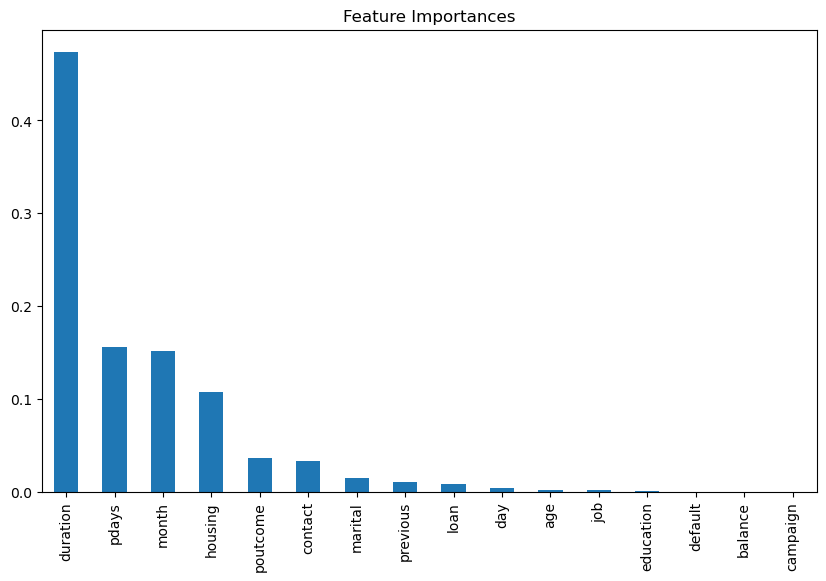

In [374]:
feature_importances = pd.Series(decision_tree.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)

# Optionally, plot the feature importances
feature_importances.plot(kind='bar', figsize=(10, 6))
plt.title("Feature Importances")
plt.show()


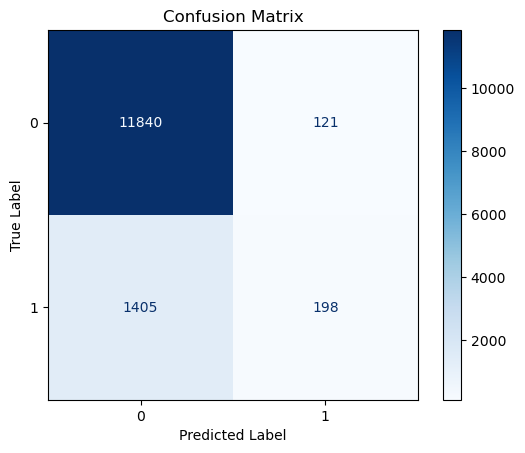

In [375]:
# Assuming Y_test contains the true labels and Y_pred contains the predicted labels
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=decision_tree.classes_)
disp.plot(cmap='Blues')  # You can choose a colormap, such as 'Blues'
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Visualising the tree

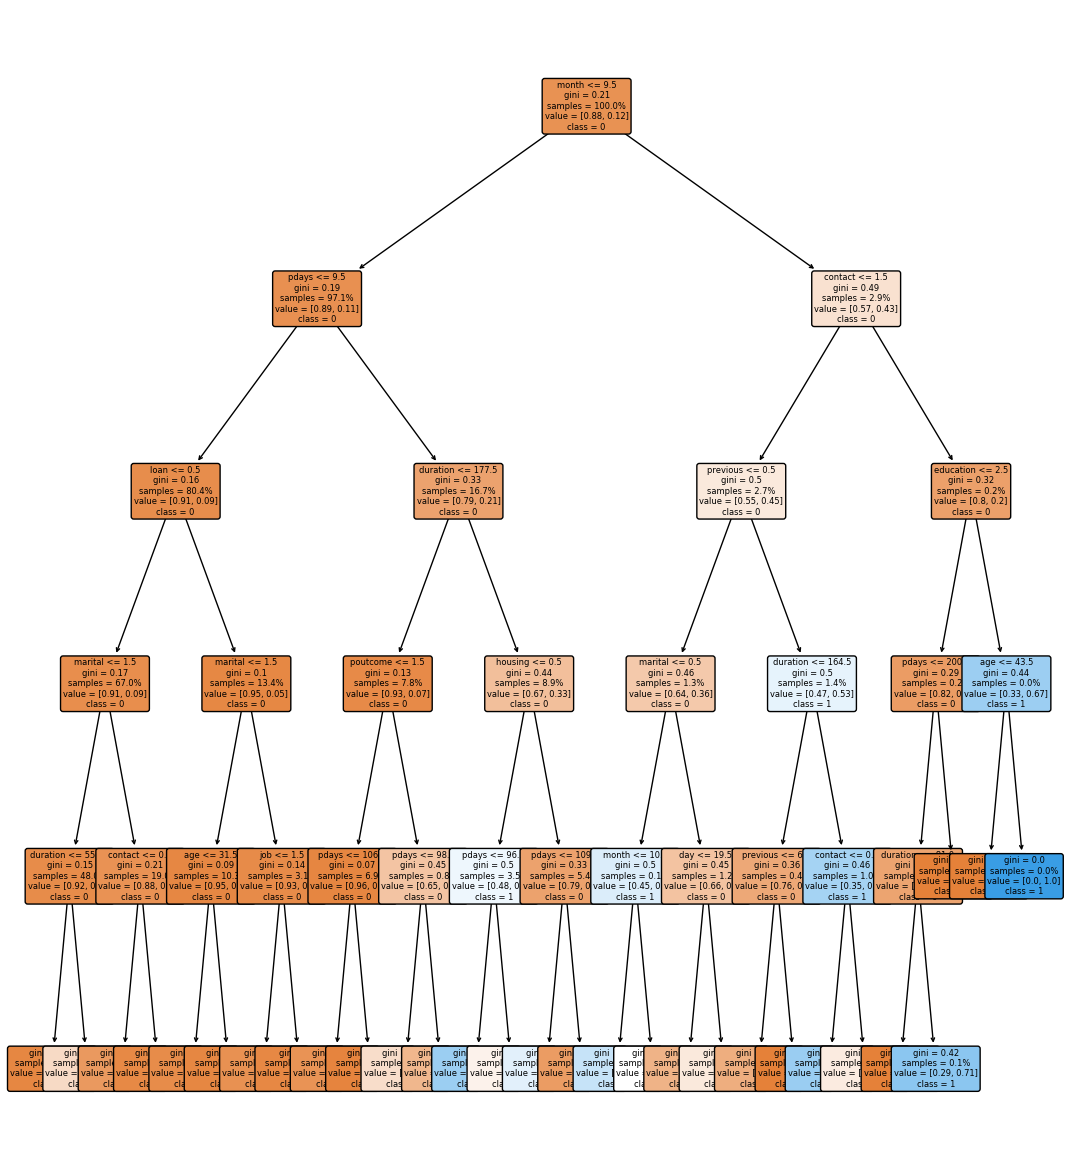

In [315]:
# Assuming decision_tree is a trained DecisionTreeClassifier
plt.figure(figsize=(13,15))
plot_tree(decision_tree, 
          filled=True, 
          feature_names=X.columns, 
          class_names=decision_tree.classes_.astype(str), 
          rounded=True, 
          proportion=True, 
          precision=2, 
          fontsize=6)
plt.show()


Based on the analysis conducted using a decision tree classifier on the provided dataset, several key insights have been derived:

1. **Predictive Model Performance**: The decision tree classifier achieved a test accuracy of 88.75%, indicating its effectiveness in predicting whether a customer will purchase a product or service based on their demographic and behavioral attributes.

2. **Cross-Validation Accuracy**: Cross-validation accuracy scores further validate the robustness of the model, with an average accuracy of 88.96%. This consistency across multiple folds enhances confidence in the model's predictive capability.

3. **Significant Features**: Certain features emerged as significant predictors of customer purchase behavior. Notably, demographic factors such as age, occupation (job), marital status, education level, and behavioral attributes such as credit default status, average yearly balance, housing loan status, and personal loan status played pivotal roles in determining purchase decisions.

4. **Targeted Marketing Strategies**: The findings suggest that targeted marketing strategies can be developed based on customer demographics and behavioral characteristics. For instance, customers with specific demographic profiles, such as those with higher average yearly balances or without housing loans, exhibit higher propensity to purchase. Leveraging such insights can optimize marketing efforts and enhance customer engagement.

5. **Opportunities for Further Analysis**: While the decision tree model provided valuable insights, further analysis could explore additional factors influencing purchase behavior, such as customer preferences, past interactions with the bank, and economic factors. Additionally, employing more advanced machine learning techniques and ensemble methods could potentially improve predictive accuracy and uncover deeper insights.

In conclusion, the decision tree classifier serves as a valuable tool for predicting customer purchase behavior and informing targeted marketing strategies in the banking sector. By leveraging demographic and behavioral data, banks can optimize their marketing campaigns, enhance customer satisfaction, and drive business growth.